<a href="https://colab.research.google.com/github/mhc999/BankMarketing-Prediction/blob/main/Moukthika_Gunapaneedu_ProjectA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Bank Marketing Campaign Analysis & Prediction  

### 🏦 Understanding Customer Behavior & Optimizing Marketing Strategies  

This notebook performs **data collection, cleaning, exploratory data analysis (EDA), and predictive modeling** to analyze **bank marketing campaigns**. The goal is to **identify key factors influencing customer subscription rates** and **improve marketing effectiveness**.


### DATA GATHERING

In [1]:
import requests
import pandas as pd

# Define the API URL
url = "https://bankdata-gvl5.onrender.com/data"

# Define headers with the API key
headers = {
    "API_KEY": "ae1301de2707746e2c4c403926a86c13"
}

# Make the GET request
response = requests.get(url, headers=headers)

# Check for successful response
if response.status_code == 200:
    data = response.json()

    # Convert JSON data to Pandas DataFrame
    df = pd.DataFrame(data)

    # Save as CSV file
    csv_filename = "bank_data.csv"
    df.to_csv(csv_filename, index=False)

    print(f"Data successfully saved to {csv_filename}")
else:
    print(f"Error: {response.status_code}, {response.text}")


Data successfully saved to bank_data.csv


In [2]:
df= pd.read_csv("/content/bank_data.csv")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,Unknown,5,may,261,1,-1,0,Unknown,no
1,44,technician,single,secondary,no,29,yes,no,Unknown,5,may,151,1,-1,0,Unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,Unknown,5,may,76,1,-1,0,Unknown,no
3,47,blue-collar,married,Unknown,no,1506,yes,no,Unknown,5,may,92,1,-1,0,Unknown,no
4,33,Unknown,single,Unknown,no,1,no,no,Unknown,5,may,198,1,-1,0,Unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
# Display basic info about the dataset
df_info = df.info()
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          45211 non-null  object
 2   marital      45211 non-null  object
 3   education    45211 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      45211 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     45211 non-null  object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day_of_week,0


In [8]:
# Number of unknown values
unknown_counts = df.apply(lambda x: (x == "Unknown").sum())
unknown_counts

,0
age,0
job,288
marital,0
education,1857
default,0
balance,0
housing,0
loan,0
contact,13020
day_of_week,0


The dataset consists of 45,211 records with 17 features, including demographic details, financial attributes, and marketing interactions. The target variable, y, indicates whether a client subscribed to a term deposit. Initially, some categorical features (job, education, contact, poutcome) had missing values, which were handled during data cleaning. The dataset includes both numerical and categorical variables, with key features such as age, balance, and duration influencing customer decisions.

###DATA CLEANING AND PREPROCESSING

In [9]:
# Fill 'job' and 'education' unknown values with mode
df['job'].replace("Unknown", df['job'].mode()[0], inplace=True)
df['education'].replace("Unknown", df['education'].mode()[0], inplace=True)

# Keep 'contact' unknown values as a separate category
df['contact'].fillna("unknown", inplace=True)

df.head()

<ipython-input-9-6c4de274860a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['job'].replace("Unknown", df['job'].mode()[0], inplace=True)
<ipython-input-9-6c4de274860a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,Unknown,5,may,261,1,-1,0,Unknown,no
1,44,technician,single,secondary,no,29,yes,no,Unknown,5,may,151,1,-1,0,Unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,Unknown,5,may,76,1,-1,0,Unknown,no
3,47,blue-collar,married,secondary,no,1506,yes,no,Unknown,5,may,92,1,-1,0,Unknown,no
4,33,blue-collar,single,secondary,no,1,no,no,Unknown,5,may,198,1,-1,0,Unknown,no


In [10]:
df.to_csv("df_cleaned.csv", index=False)
df_cleaned = pd.read_csv("df_cleaned.csv")

In [11]:
# Check for any remaining missing values
missing_values_final = df_cleaned.isnull().sum()

# Check for duplicate rows
duplicates_count = df_cleaned.duplicated().sum()

# Summary statistics for numerical features
summary_stats = df_cleaned.describe()

In [12]:
missing_values_final

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day_of_week,0


In [13]:
duplicates_count

0

In [14]:
summary_stats

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


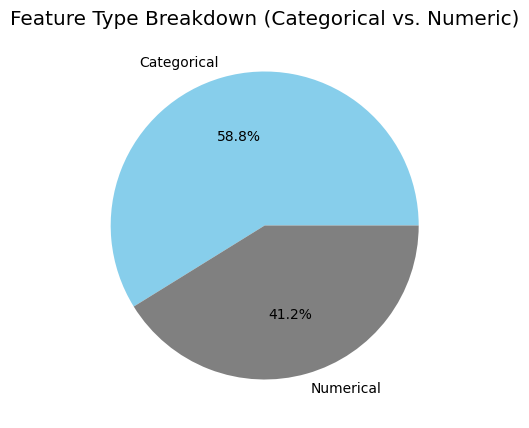

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visual styling
plt.style.use('ggplot')

# Feature Type Breakdown (Categorical vs. Numeric)
categorical_cols = df_cleaned.select_dtypes(include=["object"]).columns
numeric_cols = df_cleaned.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(6, 5))
plt.pie([len(categorical_cols), len(numeric_cols)], labels=["Categorical", "Numerical"], autopct="%1.1f%%", colors=["skyblue", "gray"])
plt.title("Feature Type Breakdown (Categorical vs. Numeric)")
plt.show()

The dataset consists of more categorical features (58.8%) than numerical ones (41.2%), indicating that much of the analysis will involve handling non-numeric data, such as job type, education, and contact methods.


### EXPLORATORY DATA ANALYSIS (EDA)

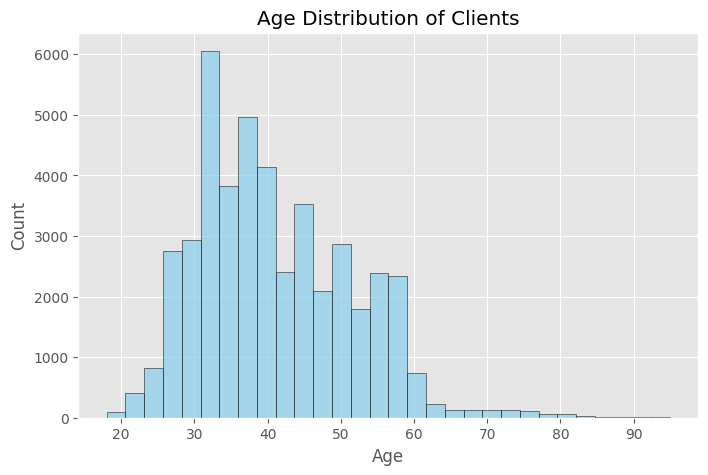

In [16]:
# 1. Age Distribution - Histogram
plt.figure(figsize=(8, 5))
plt.hist(df_cleaned['age'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title("Age Distribution of Clients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(True)
plt.show()

This histogram represents the age distribution of clients in the dataset. Most clients fall within the 30 to 50-year-old range, with the highest concentration around 30 to 40 years old. There are fewer younger and older individuals in the dataset, suggesting that the bank's primary customer base consists of middle-aged clients. Understanding this distribution is crucial, as different age groups may have varying financial needs, investment habits, and responsiveness to marketing campaigns.


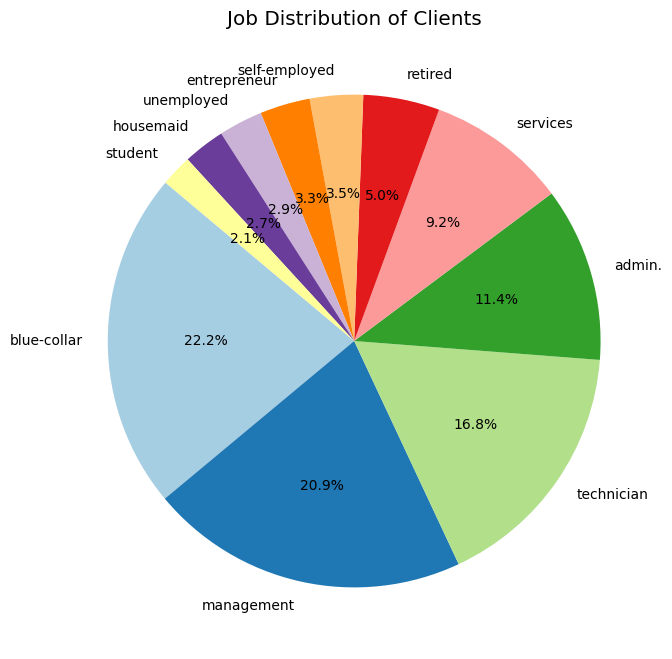

In [17]:
# 2. Job Distribution - Pie Chart
plt.figure(figsize=(8, 8))
job_counts = df_cleaned['job'].value_counts()
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Job Distribution of Clients")
plt.show()

This pie chart illustrates the breakdown of clients by occupation. The most common job categories include blue-collar workers (22.2%), management (20.9%), and technicians (16.8%). Other notable categories include administrative roles, services, and self-employed individuals. This insight helps in tailoring financial products, as different professions may have varying income levels, financial priorities, and likelihood to invest in term deposits. The relatively small proportion of students and retired individuals indicates that the bank's marketing strategy primarily targets working professionals.


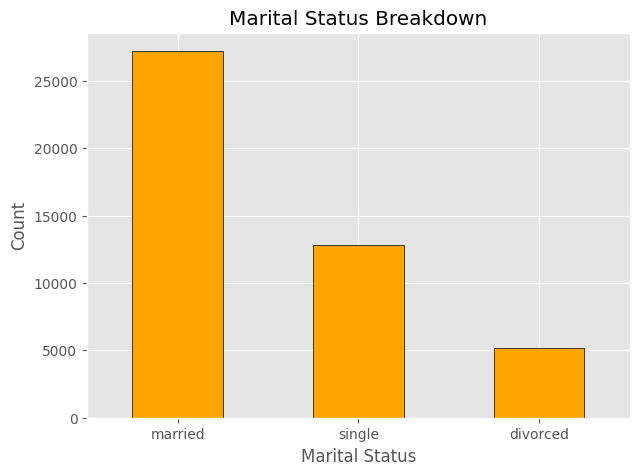

In [18]:
# 3. Marital Status Breakdown - Bar Chart
plt.figure(figsize=(7, 5))
df_cleaned['marital'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title("Marital Status Breakdown")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

This bar chart displays the distribution of clients based on their marital status. A significant portion of the clients are married, followed by single and divorced individuals. This suggests that a large part of the bank’s customer base may be financially stable individuals managing household finances. Understanding marital status can help in designing targeted financial products such as joint savings accounts, home loans, or investment plans catered to families.


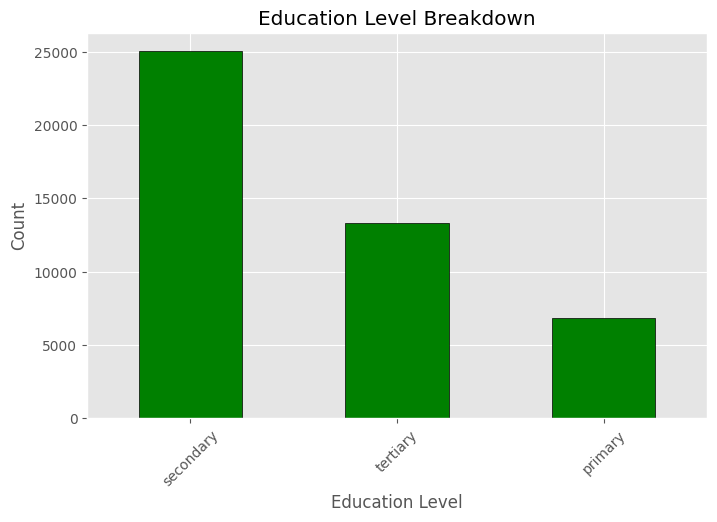

In [19]:
# 4. Education Level Breakdown - Stacked Bar Chart
education_counts = df_cleaned['education'].value_counts()
fig, ax = plt.subplots(figsize=(8, 5))
education_counts.plot(kind="bar", stacked=True, color='green', edgecolor="black", ax=ax)
plt.title("Education Level Breakdown")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

This graph highlights the educational background of clients. Secondary education is the most common level, followed by tertiary (university-level) and primary education. Clients with higher education levels may have better financial literacy and may be more likely to invest in banking products. Those with lower education levels may require simplified financial products or additional guidance in decision-making. This insight helps in designing marketing campaigns that cater to different customer segments based on their financial knowledge.


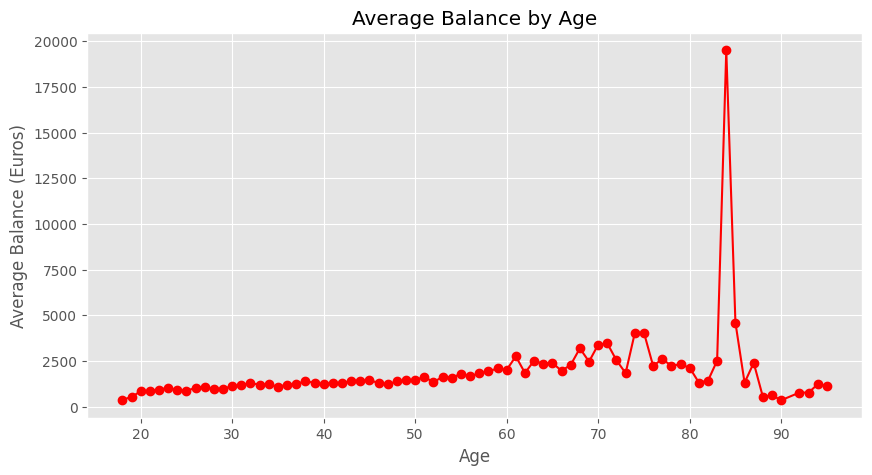

In [20]:
# 5. Balance Over Age - Line Plot
plt.figure(figsize=(10, 5))
df_cleaned.groupby('age')['balance'].mean().plot(kind='line', marker='o', color='red')
plt.title("Average Balance by Age")
plt.xlabel("Age")
plt.ylabel("Average Balance (Euros)")
plt.grid(True)
plt.show()

This line graph shows the average yearly bank balance for different age groups. Generally, older clients tend to have higher balances, likely due to accumulated savings over time. The data also reveals a few extreme outliers with significantly high balances, possibly representing wealthy individuals or business owners. Understanding this trend can help the bank offer age-specific financial products, such as retirement savings plans for older clients and investment options for younger ones.


<ipython-input-21-2d569cafd29b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_cleaned['y'], y=df_cleaned['duration'], palette="coolwarm")


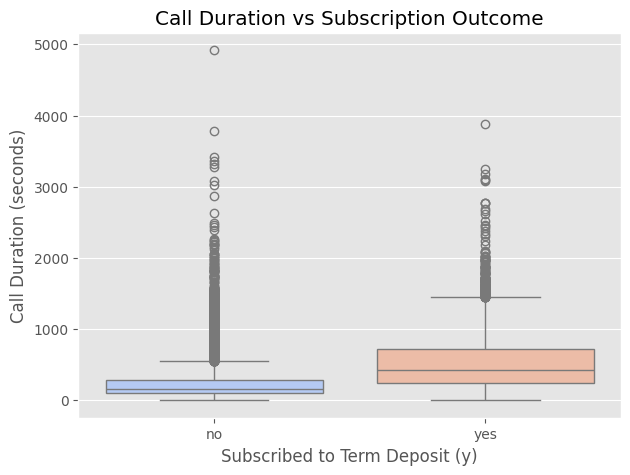

In [21]:
# 6. Call Duration vs. Subscription - Box Plot
plt.figure(figsize=(7, 5))
sns.boxplot(x=df_cleaned['y'], y=df_cleaned['duration'], palette="coolwarm")
plt.title("Call Duration vs Subscription Outcome")
plt.xlabel("Subscribed to Term Deposit (y)")
plt.ylabel("Call Duration (seconds)")
plt.show()

This box plot explores the relationship between call duration and client subscription status. It shows that clients who engaged in longer calls were more likely to subscribe to a term deposit. This suggests that effective communication and detailed discussions with potential customers play a key role in persuading them to invest. The presence of outliers with extremely long calls may indicate follow-up calls or negotiations. Banks can use this insight to train sales representatives on effective conversation strategies to increase conversion rates.


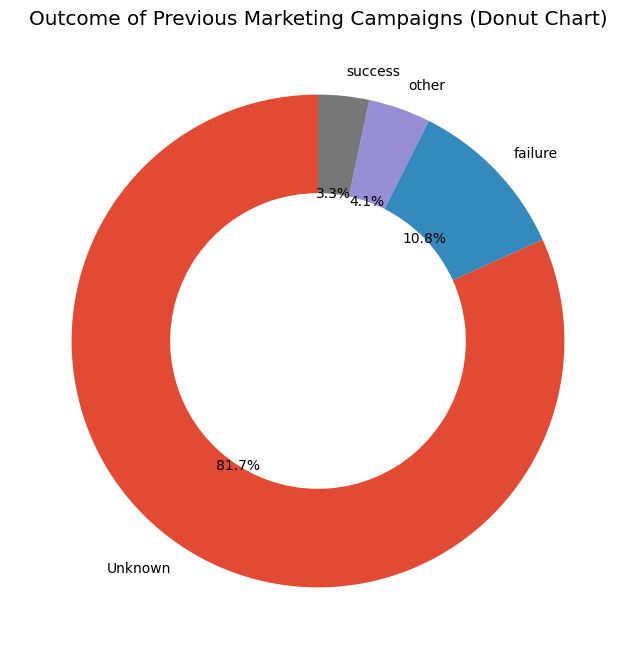

In [22]:
# 7. Previous Campaign Outcomes - Donut Chart
poutcome_counts = df_cleaned['poutcome'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(poutcome_counts, labels=poutcome_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
plt.title("Outcome of Previous Marketing Campaigns (Donut Chart)")
plt.show()

This donut chart visualizes the outcomes of previous marketing campaigns. A large proportion of clients were not previously contacted, while those who were contacted in past campaigns showed mixed results. Only a small percentage of clients successfully subscribed due to previous interactions, indicating that past marketing efforts may not have been highly effective. This suggests that improving follow-up strategies or refining customer targeting could enhance future campaign success.


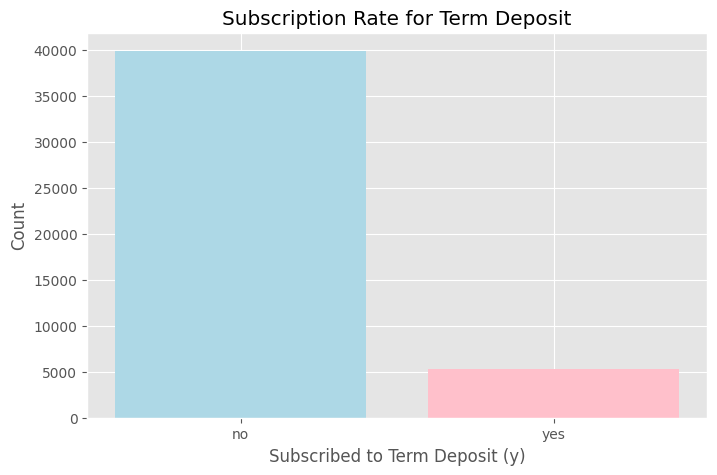

In [23]:
# 8. Subscription Rate - Alternative Treemap using Bar Chart
plt.figure(figsize=(8, 5))
y_counts = df_cleaned['y'].value_counts()
plt.bar(y_counts.index, y_counts.values, color=["lightblue", "pink"])
plt.title("Subscription Rate for Term Deposit")
plt.xlabel("Subscribed to Term Deposit (y)")
plt.ylabel("Count")
plt.show()

This chart presents the overall subscription rate among clients. The vast majority of individuals did not subscribe, indicating that converting customers remains a challenge. A relatively small proportion of clients agreed to invest in a term deposit, which may suggest a need for better marketing tactics, more personalized offers, or improved customer trust. The bank may also explore whether specific groups (e.g., by age, job, or education) have a higher likelihood of subscribing.


<ipython-input-24-fff400744f95>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df_cleaned['y'], y=df_cleaned['pdays'], palette="muted")


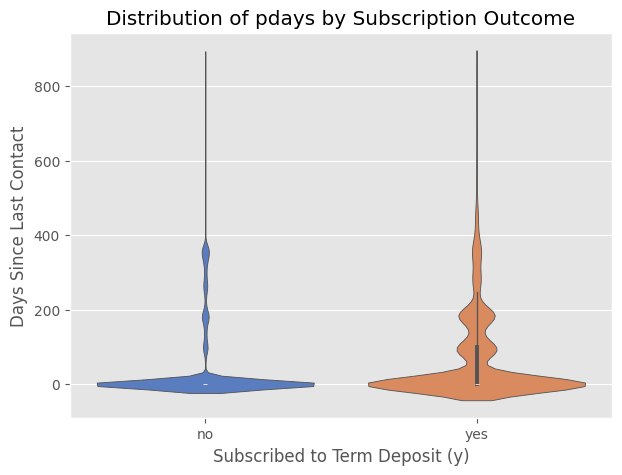

In [24]:
# 9. Impact of pdays on Subscription - Violin Plot
plt.figure(figsize=(7, 5))
sns.violinplot(x=df_cleaned['y'], y=df_cleaned['pdays'], palette="muted")
plt.title("Distribution of pdays by Subscription Outcome")
plt.xlabel("Subscribed to Term Deposit (y)")
plt.ylabel("Days Since Last Contact")
plt.show()

This violin plot illustrates the distribution of pdays, which represents the number of days since a client was last contacted in a previous campaign. The plot shows that clients who were contacted more recently (lower pdays values) were more likely to subscribe, reinforcing the importance of timely follow-ups. Those who were contacted a long time ago or never before (pdays = -1) had a lower probability of subscribing. This highlights the significance of maintaining customer engagement and improving follow-up efficiency.



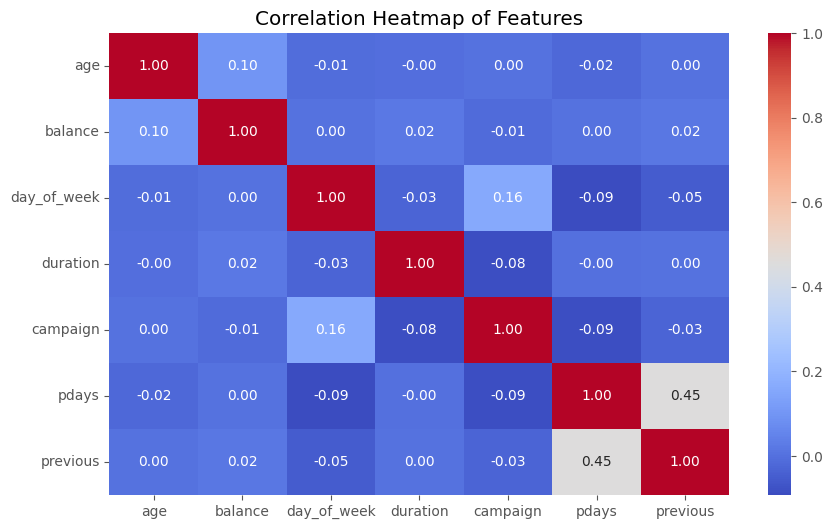

In [25]:
# 10. Feature Correlation - Heatmap with Annotations
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

This heatmap visualizes the correlations between different numerical features in the dataset. A strong positive correlation is observed between call duration and subscription success, meaning that longer call durations tend to result in more successful term deposit subscriptions. Other variables, such as age and balance, show relatively weak correlations, suggesting that demographic factors alone may not be strong predictors. Understanding these relationships can guide feature selection when building a predictive model.
